In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path=r"C:\Users\Welcome\Downloads\Data Analyst Intern Assignment - Excel.xlsx"
data = pd.ExcelFile(file_path)

In [3]:
data.sheet_names

['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

In [4]:
user= data.parse('UserDetails.csv')
cooking=data.parse('CookingSessions.csv')
order=data.parse('OrderDetails.csv')

In [5]:
user.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [6]:
cooking.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [7]:
order.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [8]:
order.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

In [9]:
cooking.isnull().sum()

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

In [10]:
user.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [11]:
order['Rating']=order['Rating'].fillna(order['Rating'].median())

In [12]:
order.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.0,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [13]:
print("Unique User IDs in UserDetails:", user['User ID'].nunique())
print("Unique User IDs in CookingSessions:", cooking['User ID'].nunique())
print("Unique User IDs in OrderDetails:", order['User ID'].nunique())
print("Unique Session IDs in CookingSessions:", cooking['Session ID'].nunique())
print("Unique Session IDs in OrderDetails:", order['Session ID'].nunique())
user_sessions = pd.merge(cooking, user, on='User ID', how='inner')
final_data = pd.merge(user_sessions, order, on=['User ID', 'Session ID'], how='inner')

Unique User IDs in UserDetails: 10
Unique User IDs in CookingSessions: 8
Unique User IDs in OrderDetails: 8
Unique Session IDs in CookingSessions: 16
Unique Session IDs in OrderDetails: 16


In [14]:
final_data.shape

(16, 24)

In [15]:
final_data.head(16)

,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,...,Favorite Meal,Total Orders,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,Dinner,12,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,Lunch,8,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,Breakfast,15,1003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.0
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,Dinner,12,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,Dinner,10,1005,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,Bob Smith,35,...,Lunch,8,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,Emma White,30,...,Lunch,9,1007,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,Charlie Lee,42,...,Breakfast,15,1008,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,4.0
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,Alice Johnson,28,...,Dinner,12,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,Bob Smith,35,...,Lunch,8,1010,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0


In [16]:
popular_dishes = final_data['Dish Name_y'].value_counts().head(10)
print("Top 10 Popular Dishes:\n", popular_dishes)

Top 10 Popular Dishes:
 Dish Name_y
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


Correlation between session ratings and order amounts:
                 Session Rating  Amount (USD)
Session Rating        1.000000     -0.375656
Amount (USD)         -0.375656      1.000000


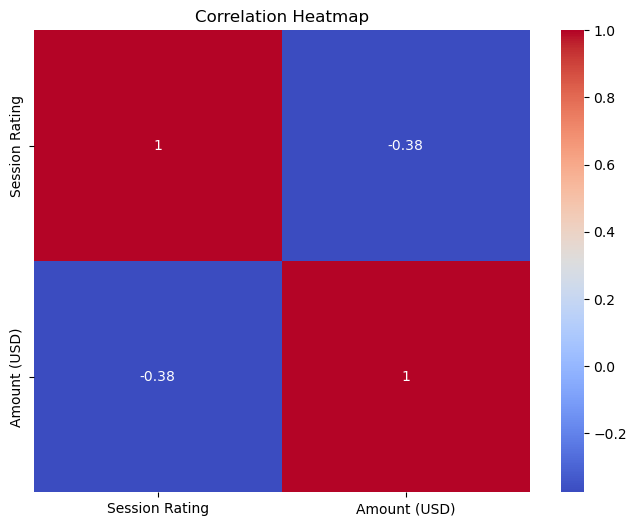

In [17]:
session_order_corr = final_data.groupby('User ID').agg({'Session Rating': 'mean','Amount (USD)': 'sum'}).corr()
print("Correlation between session ratings and order amounts:\n", session_order_corr)
plt.figure(figsize=(8, 6))
sns.heatmap(session_order_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Welcome\AppData\Local\Temp\ipykernel_22448\913052444.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=revenue_df, palette='Blues')


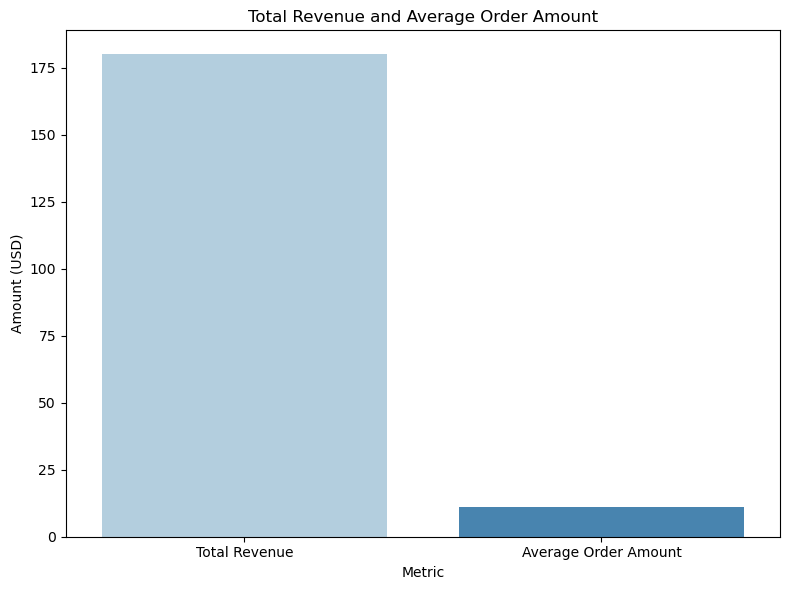

In [18]:
total_revenue = final_data['Amount (USD)'].sum()
average_order_amount = final_data['Amount (USD)'].mean()

revenue_data = {
    'Metric': ['Total Revenue', 'Average Order Amount'],
    'Value': [total_revenue, average_order_amount]
}
revenue_df = pd.DataFrame(revenue_data)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=revenue_df, palette='Blues')

# Add labels and title
plt.title('Total Revenue and Average Order Amount')
plt.ylabel('Amount (USD)')
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
demographic_analysis = final_data.groupby('Location').agg({'Total Orders': 'mean','Amount (USD)': 'mean'}).sort_values(by='Amount (USD)', ascending=False)
print("Demographic influence on spending:\n", demographic_analysis)

Demographic influence on spending:
                Total Orders  Amount (USD)
Location                                 
Boston                 14.0     14.000000
Austin                  7.0     13.000000
New York               12.0     11.666667
Seattle                 9.0     11.250000
Miami                   5.0     11.000000
San Francisco          10.0     10.750000
Chicago                15.0     10.666667
Los Angeles             8.0     10.333333


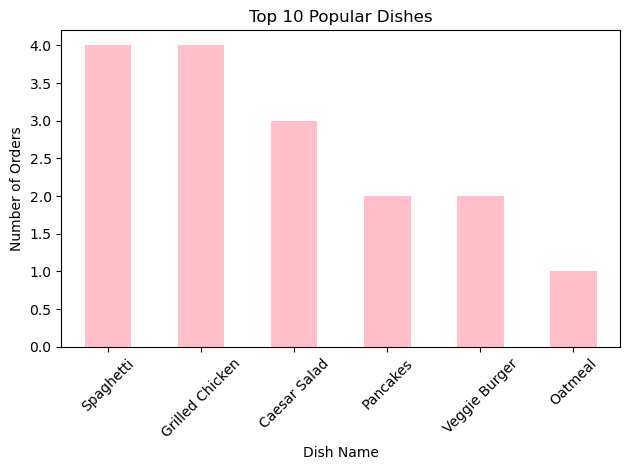

In [20]:
popular_dishes.plot(kind='bar', color='pink')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dish Name_y    Caesar Salad  Grilled Chicken  Oatmeal  Pancakes  Spaghetti  \
Location                                                                     
Austin                    0                1        0         0          0   
Boston                    0                0        0         0          1   
Chicago                   0                1        0         1          0   
Los Angeles               1                0        1         0          1   
Miami                     0                0        0         0          0   
New York                  0                1        0         1          1   
San Francisco             1                0        0         0          1   
Seattle                   1                1        0         0          0   

Dish Name_y    Veggie Burger  
Location                      
Austin                     0  
Boston                     0  
Chicago                    1  
Los Angeles                0  
Miami                      1  
Ne

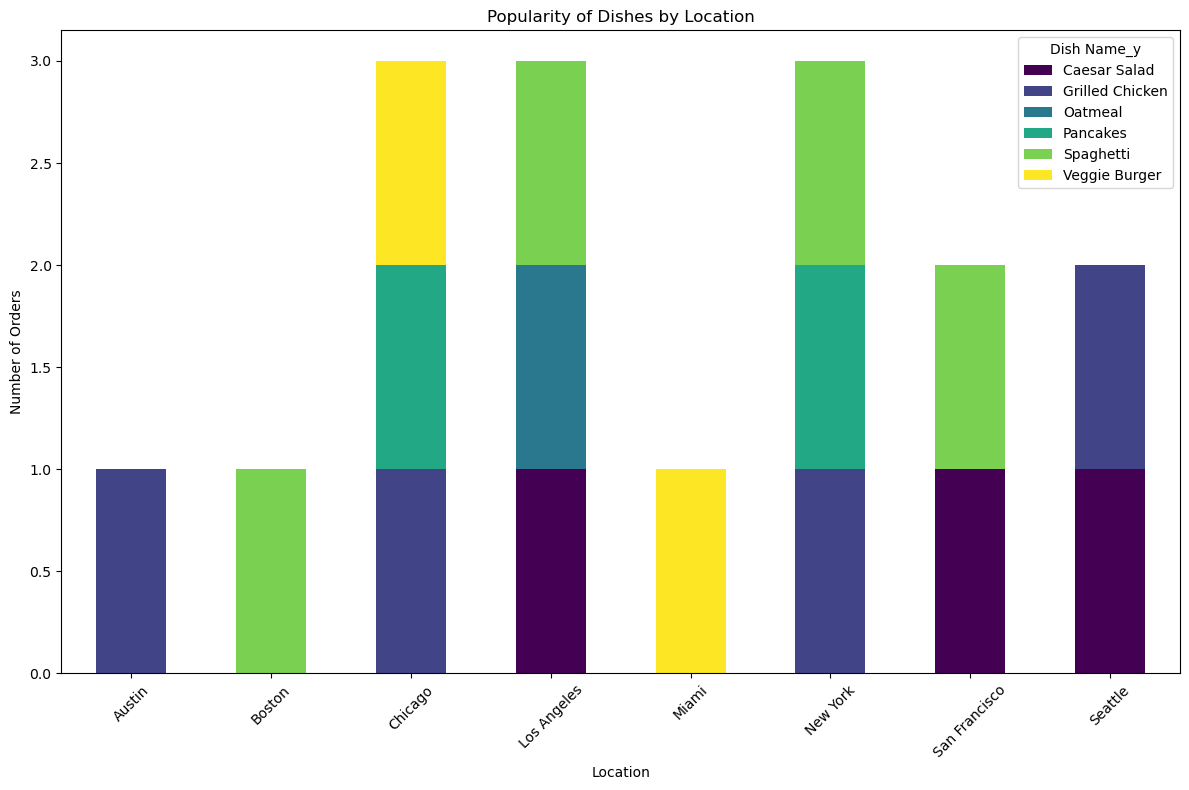

In [21]:
location_dish_trends = final_data.groupby(['Location', 'Dish Name_y']).size().unstack(fill_value=0)
print(location_dish_trends)
location_dish_trends.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Popularity of Dishes by Location')
plt.xlabel('Location')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Alignment between Meal Type_x and Meal Type_y:
 Meal Type_y  Breakfast  Dinner  Lunch
Meal Type_x                          
Breakfast            3       0      0
Dinner               0       8      0
Lunch                0       0      5


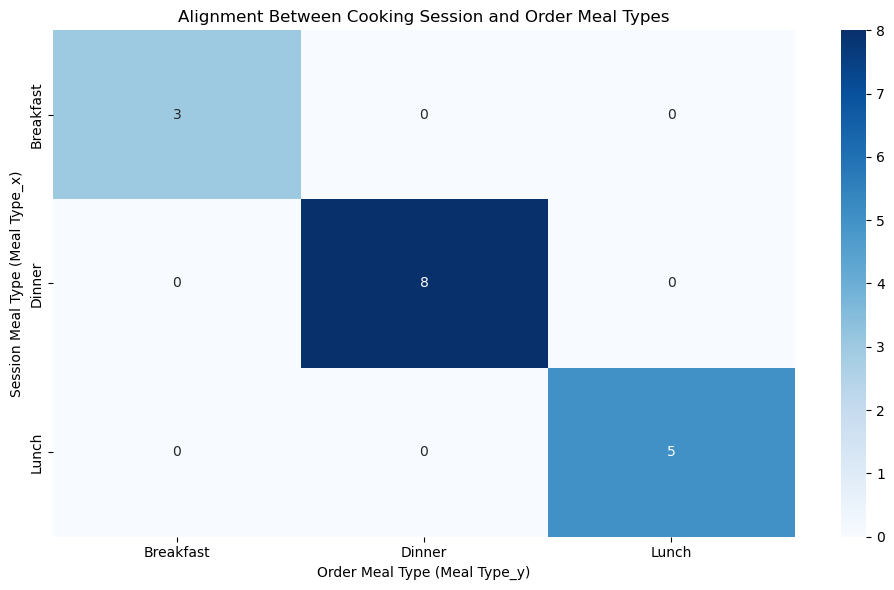

In [22]:
meal_type_comparison = final_data.groupby(['Meal Type_x', 'Meal Type_y']).size().unstack(fill_value=0)
print("Alignment between Meal Type_x and Meal Type_y:\n", meal_type_comparison)
plt.figure(figsize=(10, 6))
sns.heatmap(meal_type_comparison, annot=True, fmt='d', cmap='Blues')
plt.title('Alignment Between Cooking Session and Order Meal Types')
plt.xlabel('Order Meal Type (Meal Type_y)')
plt.ylabel('Session Meal Type (Meal Type_x)')
plt.tight_layout()
plt.show()

In [23]:
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Session ID         16 non-null     object        
 1   User ID            16 non-null     object        
 2   Dish Name_x        16 non-null     object        
 3   Meal Type_x        16 non-null     object        
 4   Session Start      16 non-null     datetime64[ns]
 5   Session End        16 non-null     datetime64[ns]
 6   Duration (mins)    16 non-null     int64         
 7   Session Rating     16 non-null     float64       
 8   User Name          16 non-null     object        
 9   Age                16 non-null     int64         
 10  Location           16 non-null     object        
 11  Registration Date  16 non-null     datetime64[ns]
 12  Phone              16 non-null     object        
 13  Email              16 non-null     object        
 14  Favorite Mea

In [24]:
age_group_data = final_data.groupby('Age').agg({'Order ID': 'count', 'Session ID': 'count'}).reset_index()
age_group_data.columns = ['Age', 'Total Orders', 'Total Sessions'
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Total Orders', data=age_group_data, color='blue', alpha=0.6, label='Total Orders')
sns.barplot(x='Age', y='Total Sessions', data=age_group_data, color='orange', alpha=0.6, label='Total Sessions')
plt.title('Engagement by Age Group: Orders vs Cooking Sessions')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

SyntaxError: '[' was never closed (2826288491.py, line 2)

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(final_data['Duration (mins)'], final_data['Total Orders'], c=final_data['Session Rating'], cmap='viridis', alpha=0.7)
plt.title('Session Duration vs. Total Orders')
plt.xlabel('Duration (mins)')
plt.ylabel('Total Orders')
cbar = plt.colorbar(scatter)
cbar.set_label('Session Rating')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Meal Type_y', hue='Dish Name_y', data=final_data, palette='Set2')
plt.title('Popular Dishes by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Dish Count')
plt.xticks(rotation=45)
plt.legend(title='Dish Name')
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
meal_counts = final_data['Favorite Meal'].value_counts()
plt.pie(meal_counts, labels=meal_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(meal_counts)))
plt.title('Favorite Meals of Users')
plt.axis('equal') 
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Amount (USD)'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Order Amounts')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
location_avg_order = final_data.pivot_table(values='Amount (USD)', index='Location', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(location_avg_order, annot=True, cmap='coolwarm', cbar_kws={'label': 'Average Order Amount'})
plt.title('User Location vs. Average Order Amount')
plt.xlabel('Average Order Amount (USD)')
plt.ylabel('Location')
plt.show()

In [ ]:
cancellation_data = final_data.groupby('Dish Name_y')['Order Status'].value_counts(normalize=True).unstack().fillna(0)
cancellation_data['Cancellation Rate'] = cancellation_data['Canceled'] * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_data.index, y=cancellation_data['Cancellation Rate'], palette='coolwarm')
plt.title('Cancellation Rates by Dish')
plt.xlabel('Dish')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()